# Subterranea: Day-Knights and Night-Knights 
This notebook explores a set of logic puzzles inspired by some puzzle types found in Raymond Smullyan's "To Mock a Mockingbird".

> In the city of Subterranea the inhabitants are of two types: day-knights and night-knights. Day-knights tell the truth during the day and lie at night, night-knights tell the truth at night and lie during the day. 

While visiting the strange city of Subterranea, you encounter two inhabitants. Each of the subterraneans makes a statement - from their statements can you determine: is it night or day, and is each inhabitant a day-knight or a night-knight?

First we define some functions to create and manipulate the data structures. We represent the state of affairs as a triple like day-day-day where the first entry says whether it is day or night, the second entry says if the first person is a day-knight or a night-knight, and the third entry says whether the second person is a day-knight or a night-knight.

In [1]:
import math

time = ['day', 'night']
options = []

for i in time:
    for j in time:
        for k in time:
            options.append([i,j,k])
            
def opposite(day):
    if day == 'day':
        return 'night'
    return 'day'

def truthValue(person, option):
    return option[0] == option[person]

def firstInhabitant(option):
    return truthValue(1,option)

def secondInhabitant(option):
    return truthValue(2, option)

def inhabitantTruths(person, statements = options):
    truths = []
    for o in statements:
        if o[0] == o[person]:
            truths.append(o)
    return truths

def inhabitantLies(person, statement = options):
    lies = []
    for o in statement:
        if o[0] != o[person]:
            lies.append(o)
    return lies

def complement(s):
    comp = []
    for o in options:
        if (o[0]!=s[0] or o[1]!= s[1] or o[2]!=s[2]):
            comp.append(o)
    return comp

def reducedAdd(listOne, listTwo):
    reduced = [] + listTwo
    for l in listOne:
        if l not in listTwo:
            reduced.append(l)
    return reduced

def fullComplement(statements):
    comp = []
    for s in statements:
        comp = reducedAdd(comp, complement(s))
    for s in statements:
        if s in comp:
            comp.remove(s)
    return comp

def intersection(set1,set2):
    intersect = []
    for s in set1:
        if s in set2:
            intersect.append(s)
    return intersect



Next we define functions for generating the structures that go with different types of statements.

In [2]:
def dayAlone(day):
    statements = []
    for i in time:
        for j in time:
            statements.append([day, i, j])
    return statements
 
def dayAloneStatement(day):
    return "It is " + day + "."

def selfAlone(person, self):
    a = ['blank','blank','blank']
    a[0]= 'day'
    a[person] = self
    a[2 -math.floor(person/2) % 2] = 'day';
    b = ['blank','blank','blank']
    b[0] = 'day'
    b[person] = self
    b[2 -math.floor(person/2) % 2] = 'night';
    c = ['blank','blank','blank']
    c[0]= 'night'
    c[person] = self
    c[2 -math.floor(person/2) % 2] = 'day';
    d = ['blank','blank','blank']
    d[0]= 'night'
    d[person] = self
    d[2 -math.floor(person/2) % 2] = 'night';   
    return [a,b,c,d]
    
def selfAloneStatement(day):
    return "I am a " + day + "-knight."

def otherAloneStatement(day):
    return "The other person is a " + day + "-knight."

#the person is making a statement about themselves and the day
def selfAndDay(person, self, day):
    a = ['blank','blank','blank']
    a[0]= day
    a[person] = self
    a[2 -math.floor(person/2) % 2] = 'day';
    b = ['blank','blank','blank']
    b[0] = day
    b[person] = self
    b[2 -math.floor(person/2) % 2] = 'night';
    return [a,b]

def selfAndDayStatement(self, day):
    return "I am a " + self + "-knight, and it is " + day + "."

def oppositeDayStatement(day):
    return "It is not " + opposite(day) +"."


# the person is making a statement about the other and the day 
def otherAndDay(person, other, day):
    a = ['blank','blank','blank']
    a[0]= day
    a[person] = 'day'
    a[2 -math.floor(person/2) % 2] = other;
    b = ['blank','blank','blank']
    b[0] = day
    b[person] = 'night'
    b[2 -math.floor(person/2) % 2] = other;
    return [a,b]

def otherAndDayStatement(other, day):
    return "The other persion is a " + other + "-knight, and it is " + day + "."

# the person is making a statement themselves and the other 
def otherAndSelf(person, self, other):
    a = ['blank','blank','blank']
    a[0]= 'day'
    a[person] = self
    a[2 -math.floor(person/2) % 2] = other;
    b = ['blank','blank','blank']
    b[0] = 'night'
    b[person] = self
    b[2 -math.floor(person/2) % 2] = other;
    return [a,b]

def otherAndSelfStatement(other, self):
    return "I am a " + self + "-knight, and the other persion is a " + other + "-knight."

Next, create two lists of statements, one for the first person and one for the second.

In [31]:
person1Statements = []
person2Statements = []
for p in time:
    for d in time:        
        person1Statements.append({'statement': selfAndDayStatement(p,d), 'state': selfAndDay(1,p,d)})
        person1Statements.append({'statement': otherAndDayStatement(p,d), 'state': otherAndDay(1,p,d)})
        person1Statements.append({'statement': otherAndSelfStatement(p,d), 'state': otherAndSelf(1,p,d)})
        person2Statements.append({'statement': selfAndDayStatement(p,d), 'state': selfAndDay(2,p,d)})
        person2Statements.append({'statement': otherAndDayStatement(p,d), 'state': otherAndDay(2,p,d)})
        person2Statements.append({'statement': otherAndSelfStatement(p,d), 'state': otherAndSelf(2,p,d)})
        person1Statements.append({'statement': dayAloneStatement(d), 'state': dayAlone(d)})
        person2Statements.append({'statement': dayAloneStatement(d), 'state': dayAlone(d)})
        person1Statements.append({'statement': selfAloneStatement(d), 'state': selfAlone(1,p)})
        person2Statements.append({'statement': selfAloneStatement(d), 'state': selfAlone(2,p)})
        person1Statements.append({'statement': oppositeDayStatement(d), 'state': dayAlone(d)})
        person2Statements.append({'statement': oppositeDayStatement(d), 'state': dayAlone(d)})
print("Each person has " + str(len(person2Statements)) + " statements they can make.")

allStatements = []
statement_index = 0;
for s in person1Statements:
    allStatements.append(s['statement'])
    print(str(statement_index) + ": " +s['statement'])
    statement_index = statement_index +1

Each person has 24 statements they can make.
0: I am a day-knight, and it is day.
1: The other persion is a day-knight, and it is day.
2: I am a day-knight, and the other persion is a day-knight.
3: It is day.
4: I am a day-knight.
5: It is not night.
6: I am a day-knight, and it is night.
7: The other persion is a day-knight, and it is night.
8: I am a night-knight, and the other persion is a day-knight.
9: It is night.
10: I am a night-knight.
11: It is not day.
12: I am a night-knight, and it is day.
13: The other persion is a night-knight, and it is day.
14: I am a day-knight, and the other persion is a night-knight.
15: It is day.
16: I am a day-knight.
17: It is not night.
18: I am a night-knight, and it is night.
19: The other persion is a night-knight, and it is night.
20: I am a night-knight, and the other persion is a night-knight.
21: It is night.
22: I am a night-knight.
23: It is not day.


In [4]:
def explain(s1, s2, solution):
    print('---------------------------------------------------------------------------')
    print('Inhabitant 1 says: ' + s1['statement'])
    print('If they are telling the truth, this could be: ' + str(inhabitantTruths(1, s1['state'])))
    print('If they are lying, this could be: ' + str(inhabitantLies(1, fullComplement(s1['state']))))
    print('Inhabitant 2 says: ' + s2['statement'])
    print('If they are telling the truth, this could be: ' + str(inhabitantTruths(2, s2['state'])))
    print('If they are lying, this could be: ' + str(inhabitantLies(2, fullComplement(s2['state']))))
    print('The only common scenario is: ' + str(solution))
    print('Inhabitant 1 is ' +str(truthValue(1,solution)))
    print('Inhabitant 2 is ' +str(truthValue(2,solution)))
        

We are going to initialize a matrix (t) to track which statements produce puzzles.

In [17]:
t = []
for i in range(len(person1Statements)):
        t.append([0]*len(person1Statements))

Finally, we check all combinations of statements from person 1 and person 2, and see which ones generate a unique solution - these will be the puzzles.

In [18]:
solutionCount = 0
p1_true = 0
p1_false = 0
p2_true = 0
p2_false = 0
day_count = 0
night_count = 0
p1_day = 0
p1_night = 0
puzzles = []
for s1 in person1Statements:
    for s2 in person2Statements:
        ts1 = inhabitantTruths(1, s1['state'])
        fs1 = inhabitantLies(1, fullComplement(s1['state']))
        allS1 = reducedAdd(ts1,fs1)
        ts2 = inhabitantTruths(2, s2['state'])
        fs2 = inhabitantLies(2, fullComplement(s2['state']))
        allS2 = reducedAdd(ts2,fs2)
        solution = intersection(allS1, allS2)
        if len(solution) ==1 :
            solutionCount = solutionCount +1
            p = {'time': solution[0][0]}
            p['person1'] = s1['statement']
            p['person2'] = s2['statement']
            p['id'] = solutionCount
            p['person1_type']= solution[0][1]
            p['person2_type']= solution[0][2]
            puzzles.append(p)
            explain(s1, s2, solution[0])
            if truthValue(1, solution[0]):
                p1_true = p1_true +1
            else:
                p1_false = p1_false +1
            if truthValue(2, solution[0]):
                p2_true = p2_true +1
            else:
                p2_false = p2_false +1
            if solution[0][0] == 'day':
                day_count = day_count +1
            else:
                night_count = night_count +1
            if solution[0][1] == 'day':
                p1_day = p1_day +1
            else:
                p1_night = p1_night+1
            val = t[allStatements.index(s1['statement'])][allStatements.index(s2['statement'])]
            t[allStatements.index(s1['statement'])][allStatements.index(s2['statement'])] = val +1
print('We generated ' + str(solutionCount) + " puzzles.")
print(str(t))

---------------------------------------------------------------------------
Inhabitant 1 says: I am a day-knight, and it is day.
If they are telling the truth, this could be: [['day', 'day', 'day'], ['day', 'day', 'night']]
If they are lying, this could be: [['day', 'night', 'day'], ['day', 'night', 'night'], ['night', 'day', 'day'], ['night', 'day', 'night']]
Inhabitant 2 says: I am a night-knight, and it is day.
If they are telling the truth, this could be: []
If they are lying, this could be: [['night', 'day', 'day'], ['night', 'night', 'day']]
The only common scenario is: ['night', 'day', 'day']
Inhabitant 1 is False
Inhabitant 2 is False
---------------------------------------------------------------------------
Inhabitant 1 says: The other persion is a day-knight, and it is day.
If they are telling the truth, this could be: [['day', 'day', 'day']]
If they are lying, this could be: [['day', 'night', 'night'], ['night', 'day', 'day'], ['night', 'day', 'night']]
Inhabitant 2 says: I

In [19]:
def jsonForPuzzle(p):
    json = '{"time":"' + p['time'] + '",' 
    json += '"person1":"' + p['person1'] + '",'
    json += '"person2":"' + p['person2'] + '",'
    json += '"person1_type":"' + p['person1_type'] + '",'
    json += '"person2_type":"' + p['person2_type'] + '",'
    json += '"id":"' + str(p['id']) + '"'
    json += "}"
    return json

In [20]:
jsonForPuzzle(p)

'{"time":"night","person1":"It is not day.","person2":"I am a night-knight, and it is day.","person1_type":"night","person2_type":"day","id":"90"}'

In [21]:
result = "["
first = True
for p in puzzles:
    if not first:
        result += ", \n"
    else:
        first = False
    result += jsonForPuzzle(p)
result += "]"
print(result)

[{"time":"night","person1":"I am a day-knight, and it is day.","person2":"I am a night-knight, and it is day.","person1_type":"day","person2_type":"day","id":"1"}, 
{"time":"day","person1":"The other persion is a day-knight, and it is day.","person2":"I am a day-knight, and it is night.","person1_type":"night","person2_type":"night","id":"2"}, 
{"time":"night","person1":"The other persion is a day-knight, and it is day.","person2":"I am a night-knight, and it is day.","person1_type":"day","person2_type":"day","id":"3"}, 
{"time":"night","person1":"The other persion is a day-knight, and it is day.","person2":"The other persion is a night-knight, and it is day.","person1_type":"day","person2_type":"day","id":"4"}, 
{"time":"night","person1":"The other persion is a day-knight, and it is day.","person2":"I am a night-knight, and the other persion is a night-knight.","person1_type":"day","person2_type":"day","id":"5"}, 
{"time":"day","person1":"I am a day-knight, and the other persion is a 

How often do the people lie? Seems like far more frequently than they tell the truth.

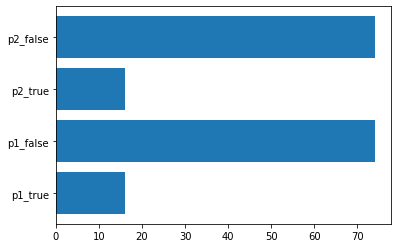

[16, 74, 16, 74]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


height = [p1_true, p1_false, p2_true, p2_false]
names = ['p1_true', 'p1_false', 'p2_true', 'p2_false']
x_axis = np.arange(len(names))    
plt.barh(x_axis, height)
plt.yticks(x_axis, names)
plt.show()
print(str(height))

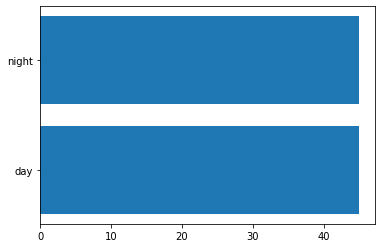

In [23]:
height = [day_count, night_count]
names = ['day', 'night']
x_axis = np.arange(len(names))    
plt.barh(x_axis, height)
plt.yticks(x_axis, names)
plt.show()

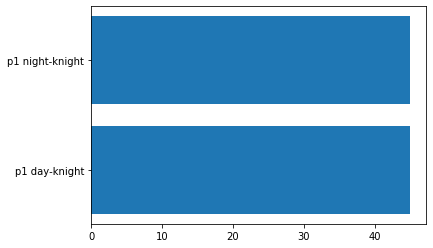

In [24]:
height = [p1_day, p1_night]
names = ['p1 day-knight', 'p1 night-knight']
x_axis = np.arange(len(names))    
plt.barh(x_axis, height)
plt.yticks(x_axis, names)
plt.show()

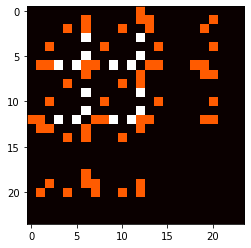

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(t, cmap='hot', interpolation='nearest')
plt.show()

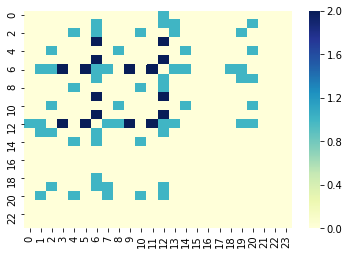

In [26]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
heat_map = sb.heatmap(t,cmap="YlGnBu")
plt.show()

In [27]:
print(str(t))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 